# Mini Project: Recommendation Engines

Recommendation engines are algorithms designed to provide personalized suggestions or recommendations to users. These systems analyze user behavior, preferences, and interactions with items (products, movies, music, articles, etc.) to predict and offer items that users are likely to be interested in. Recommendation engines play a crucial role in enhancing user experience, driving engagement, and increasing conversion rates in various applications, including e-commerce, entertainment, content platforms, and more.

There are generally two approaches taken in collaborative filtering and content-based recommendation engines:

**1. Collaborative Filtering:**
Collaborative Filtering is a popular approach to building recommendation systems that leverages the collective behavior of users to make personalized recommendations. It is based on the idea that users who have agreed in the past will likely agree in the future. There are two main types of collaborative filtering:

- **User-based Collaborative Filtering:** This method finds users similar to the target user based on their past interactions (e.g., ratings or purchases). It then recommends items that similar users have liked but the target user has not interacted with yet.

- **Item-based Collaborative Filtering:** In this approach, the system identifies similar items based on user interactions. It recommends items that are similar to the ones the target user has already liked or interacted with.

Collaborative filtering does not require any explicit information about items but relies on the similarity between users or items. It is effective in capturing complex patterns and can provide serendipitous recommendations. However, it suffers from the cold-start problem (i.e., difficulty in recommending to new users or items with no interactions) and scalability challenges in large datasets.

**2. Content-Based Recommendation:**
Content-based recommendation is an alternative approach to building recommendation systems that focuses on the attributes or features of items and users. It leverages the characteristics of items to make recommendations. The key steps involved in content-based recommendation are:

- **Feature Extraction:** For each item, relevant features are extracted. For movies, these features could be genre, director, actors, and plot summary.

- **User Profile:** A user profile is created based on the items they have interacted with in the past. The user profile contains the weighted importance of features based on their interactions.

- **Similarity Calculation:** The similarity between items or between items and the user profile is calculated using similarity metrics like cosine similarity or Euclidean distance.

- **Recommendation:** Items that are most similar to the user profile are recommended to the user.

Content-based recommendation systems are less affected by the cold-start problem as they can still recommend items based on their features. They are also more interpretable as they rely on item attributes. However, they may miss out on providing serendipitous recommendations and can be limited by the quality of feature extraction and user profiles.

**Choosing Between Collaborative Filtering and Content-Based:**
Both collaborative filtering and content-based approaches have their strengths and weaknesses. The choice between them depends on the specific requirements of the recommendation system, the type of data available, and the user base. Hybrid approaches that combine collaborative filtering and content-based techniques are also common, aiming to leverage the strengths of both methods and mitigate their weaknesses.

In this mini-project, you'll be building both content based and collaborative filtering engines for the [MovieLens 25M dataset](https://grouplens.org/datasets/movielens/25m/). The MovieLens 25M dataset is one of the most widely used and popular datasets for building and evaluating recommendation systems. It is provided by the GroupLens Research project, which collects and studies datasets related to movie ratings and recommendations. The MovieLens 25M dataset contains movie ratings and other related information contributed by users of the MovieLens website.

**Dataset Details:**
- **Size:** The dataset contains approximately 25 million movie ratings.
- **Users:** It includes ratings from over 162,000 users.
- **Movies:** The dataset consists of ratings for more than 62,000 movies.
- **Ratings:** The ratings are provided on a scale of 1 to 5, where 1 is the lowest rating and 5 is the highest.
- **Timestamps:** Each rating is associated with a timestamp, indicating when the rating was given.

**Data Files:**
The dataset is usually split into three CSV files:

1. **movies.csv:** Contains information about movies, including the movie ID, title, genres, and release year.
   - Columns: movieId, title, genres

2. **ratings.csv:** Contains movie ratings provided by users, including the user ID, movie ID, rating, and timestamp.
   - Columns: userId, movieId, rating, timestamp

3. **tags.csv:** Contains user-generated tags for movies, including the user ID, movie ID, tag, and timestamp.
   - Columns: userId, movieId, tag, timestamp

First, import all the libraries you'll need.

In [1]:
import zipfile
import numpy as np
import pandas as pd
from urllib.request import urlretrieve
from sklearn.metrics.pairwise import cosine_similarity

# Added by jmd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

Next, download the relevant components of the MoveLens dataset. Note, these instructions are roughly based on the colab [here](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/recommendation-systems/recommendation-systems.ipynb?utm_source=ss-recommendation-systems&utm_campaign=colab-external&utm_medium=referral&utm_content=recommendation-systems#scrollTo=O3bcgduFo4s6).

In [2]:
# print("Downloading movielens data...")

# urlretrieve('http://files.grouplens.org/datasets/movielens/ml-100k.zip', 'movielens.zip')
# zip_ref = zipfile.ZipFile('movielens.zip', 'r')
# zip_ref.extractall()
# print("Done. Dataset contains:")
# print(zip_ref.read('ml-100k/u.info'))

ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# The movies file contains a binary feature for each genre.
genre_cols = [
    "genre_unknown", "Action", "Adventure", "Animation", "Children", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]
movies_cols = [
    'movie_id', 'title', 'release_date', "video_release_date", "imdb_url"
] + genre_cols
movies = pd.read_csv(
    'ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')

Before doing any kind of machine learning, it's always good to familiarize yourself with the datasets you'lll be working with.

Here are your tasks:

1. Spend some time familiarizing yourself with both the `movies` and `ratings` dataframes. How many unique user ids are present? How many unique movies are there?
2. Create a new dataframe that merges the `movies` and `ratings` tables on 'movie_id'. Only keep the 'user_id', 'title', 'rating' fields in this new dataframe.

In [3]:
# Spend some time familiarizing yourself with both the movies and ratings
# dataframes. How many unique user ids are present? How many unique movies
# are there?

mov_nmovies = movies.movie_id.nunique()
print(f"There are {mov_nmovies} movies in the movies DataFrame")
rat_nmovies = ratings.movie_id.nunique()
print(f"There are {rat_nmovies} movies in the ratings DataFrame")

rat_nusers = ratings.user_id.nunique()
rat_nratings = ratings.rating.notnull().sum()
print(f"There are {rat_nusers} users and {rat_nratings} ratings in the ratings DataFrame")

There are 1682 movies in the movies DataFrame
There are 1682 movies in the ratings DataFrame
There are 943 users and 100000 ratings in the ratings DataFrame


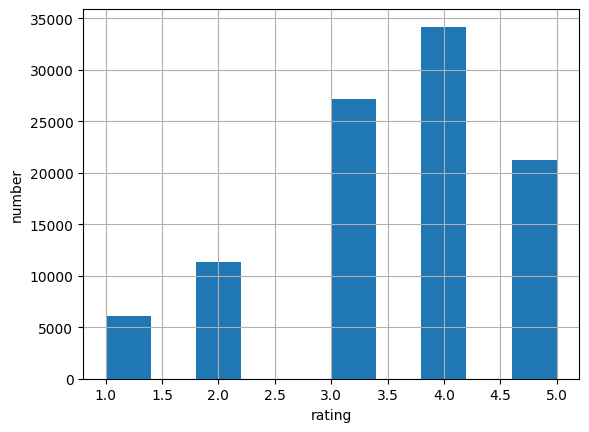

In [4]:
# Added by jmd:
# Plot the distribution of ratings
ratings.rating.hist()
plt.xlabel("rating")
plt.ylabel("number")
plt.show()

The number of ratings per user ranges from 20 to 737


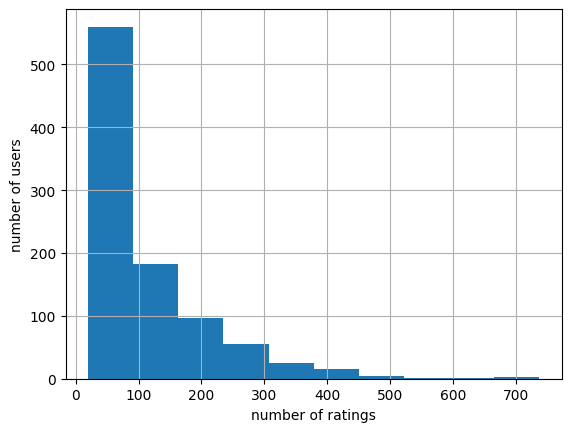

In [5]:
# Added by jmd:
# Plot the number of ratings per user
ratings_per_user = ratings.user_id.value_counts()
min_ratings = ratings_per_user.min()
max_ratings = ratings_per_user.max()
print(f"The number of ratings per user ranges from {min_ratings} to {max_ratings}")
ratings.user_id.value_counts().hist()
plt.xlabel("number of ratings")
plt.ylabel("number of users")
plt.show()

In [6]:
# Merge movies and ratings dataframes
user_ratings = ratings.merge(movies, on = "movie_id", how = "left")
print(user_ratings.shape)
print(f"User IDs range from {user_ratings.user_id.min()} to {user_ratings.user_id.max()}")
print(f"Movie IDs range from {user_ratings.movie_id.min()} to {user_ratings.movie_id.max()}")
user_ratings.head()

(100000, 27)
User IDs range from 1 to 943
Movie IDs range from 1 to 1682


,user_id,movie_id,rating,unix_timestamp,title,release_date,video_release_date,imdb_url,genre_unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0


As mentioned in the introduction, content-Based Filtering is a recommendation engine approach that focuses on the attributes or features of items (products, movies, music, articles, etc.) and leverages these features to make personalized recommendations. The underlying idea is to match the characteristics of items with the preferences of users to suggest items that align with their interests. Content-based filtering is particularly useful when explicit user-item interactions (e.g., ratings or purchases) are sparse or unavailable.

**Key Steps in Content-Based Filtering:**

1. **Feature Extraction:**
   - For each item, relevant features are extracted. These features are typically descriptive attributes that can be represented numerically, such as genre, director, actors, author, publication date, and keywords.
   - In the case of text-based items, natural language processing techniques may be used to extract features like TF-IDF (Term Frequency-Inverse Document Frequency) scores.

2. **User Profile Creation:**
   - <mark>A user profile is created based on the items they have interacted with in the past. The user profile contains the weighted importance of features based on their interactions.</mark>
   - For example, if a user has watched several action movies, the action genre feature would receive a higher weight in their profile.

3. **Similarity Calculation:**
   - The similarity between items or between items and the user profile is calculated using similarity metrics like cosine similarity, Euclidean distance, or Pearson correlation.
   - Cosine similarity is commonly used as it measures the cosine of the angle between two vectors, which represents their similarity.

4. **Recommendation:**
   - Items that are most similar to the user profile are recommended to the user. These are items whose features have the highest similarity scores with the user profile.
   - The recommended items are presented as a list sorted by their similarity scores.

**Advantages of Content-Based Filtering:**
1. **No Cold-Start Problem:** <mark>Content-based filtering can make recommendations even for new users with no historical interactions because it relies on item features rather than user history.</mark>

2. **User Independence:** The recommendations are based solely on the features of items and do not require knowledge of other users' preferences or behavior.

3. **Transparency:** Content-based recommendations are interpretable, as they depend on the features of items, making it easier for users to understand why specific items are recommended.

4. **Serendipity:** Content-based filtering can recommend items with characteristics not seen before by the user, leading to serendipitous discoveries.

5. **Diversity in Recommendations:** The method can offer diverse recommendations since it suggests items with different feature combinations.

**Limitations of Content-Based Filtering:**
1. **Limited Discovery:** Content-based filtering may struggle to recommend items outside the scope of users' historical interactions or interests.

2. **Over-Specialization:** Users may receive recommendations that are too similar to their previous choices, leading to a lack of exposure to new item categories.

3. **Dependency on Feature Quality:** The quality and relevance of item features significantly influence the quality of recommendations.

4. **Limited for Cold Items:** Content-based filtering can struggle to recommend new items with limited feature information.

Here is your task:

1. Write a function that takes in a user id and the dataframe you created before that contains 'user_id', 'title', and 'rating'. The function should return content-based recommendations for this user. Here are steps you can take:

  A. Get the user's rated movies

  B. Create a TF-IDF matrix using movie genres. Note, this can be extracted from the `movies` dataframe.

  C. Compute the cosine similarity between movie genres. Use the [cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) function.

  D. Get the indices of similar movies to those rated by the user based on cosine similarity. Keep only the top 5.

  E. Remove duplicates and movies already rated by the user.

In [7]:
# Initialize empty list to hold genres for all movies
movie_genres = []
# Loop over movies
for index, row in movies.iterrows():
    # Get the genre names for this movie
    movie_row = row[9:]
    movie_genres_list = list(movie_row[movie_row == 1].index)
    movie_genres_string = " ".join(movie_genres_list)
    movie_genres.append(movie_genres_string)


# Content-Based Filtering using Movie Genres
def content_based_recommendation(user_id, df):
    
    ### 
    ### Get the user's rated movies
    ###

    if not user_id in df.user_id.values:
        print(f"{user_id} is not a valid user ID")
        return
    user_df = df[df.user_id == user_id]
    
    # Initialize empty string to hold all genres for this user
    user_genres = ""
    # Loop over all ratings for this user
    for index, row in user_df.iterrows():
        # Get the genre names for this movie
        movie_row = row[9:]
        rated_movie_genres = list(movie_row[movie_row == 1].index)
        # Repeat the genres by the rating
        weighted_movie_genres = rated_movie_genres * row.rating
        # Convert list to string
        movie_genres_string = " ".join(weighted_movie_genres)
        user_genres = user_genres + " " + movie_genres_string
    
    # Combine the user's genres and all movie genres
    all_genres = [user_genres]
    all_genres.extend(movie_genres)
    # Change Sci-Fi to SciFi so TF-IDF treats is as one word
    all_genres = [txt.replace("Sci-Fi", "SciFi") for txt in all_genres]
    # Change Film-Noir to FilmNoir so TF-IDF treats is as one word
    all_genres = [txt.replace("Film-Noir", "FilmNoir") for txt in all_genres]
    # Use index = 0 for the user followed by all movie IDs
    index = movies.movie_id
    index = np.insert(index, 0, 0)
    # Make a DataFrame with genres 
    all_genres_df = pd.DataFrame(all_genres, index = index, columns = ["genres"])
    
    ###
    ### Create a TF-IDF matrix using movie genres
    ###
    
    # Instantiate and fit the TF-IDF
    tfidfvec = TfidfVectorizer()
    vectorized_data = tfidfvec.fit_transform(all_genres)
    tfidf_df = pd.DataFrame(vectorized_data.toarray(), columns = tfidfvec.get_feature_names_out())
    # print(f"Shape of the TF-IDF DataFrame: {tfidf_df.shape}")
    # print(f"User {user_id} is row 0")
    # print(tfidf_df.head(3))
    
    # Print the top three genres preferred by this user
    top3_list = list(tfidf_df.iloc[0, :].sort_values(ascending = False).index[:3])
    print(f"User {user_id} top preferences include {', '.join(top3_list)}.")

    ### Compute the cosine similarity between movie genres
    
    # Calculate cosine similarity between all items
    cossim = cosine_similarity(tfidf_df)
    # Get the first row and remove the user-user self-match
    cossim = np.delete(cossim[0], 0)
    # Turn it into a DataFrame with movie IDs as index
    cossim = pd.DataFrame(cossim, index = movies.movie_id)
    # Merge with movie titles
    titles = movies[["movie_id", "title"]]
    titles.set_index("movie_id", inplace = True)
    cossim = pd.concat((cossim, titles), axis = 1)
        
    ### 
    ### Remove duplicates and movies already rated by the user
    ###
    
    # Drop movies already rated by user
    cossim.drop(index = user_df.movie_id, inplace = True)
    # Drop duplicated movies
    cossim.drop(cossim[cossim.title.duplicated()].index, inplace = True)

    ###
    ### Get the indices of the similar movies based on cosine similarity
    ###
    
    # Now use the title as index
    cossim.set_index("title", inplace = True)
    # Sort values and get top 5 movies
    movie_list = list(cossim.iloc[:, 0].sort_values(ascending = False).index[:5])
    print("Content-based recommendations:")
    print(movie_list)


The key idea behind collaborative filtering is that users who have agreed in the past will likely agree in the future. Instead of relying on item attributes or user profiles, collaborative filtering identifies patterns of user behavior and item preferences from the interactions present in the data.

**Types of Collaborative Filtering:**
There are two main types of collaborative filtering:

**Collaborative Filtering Process:**
The collaborative filtering process typically involves the following steps:

1. **Data Collection:**
   - Gather data on user-item interactions, such as movie ratings, product purchases, or article clicks.

2. **User-Item Matrix:**
   - Organize the data into a user-item matrix, where rows represent users, columns represent items, and the entries contain the users' interactions (e.g., ratings).

3. **Similarity Calculation:**
   - Calculate the similarity between users or items using similarity metrics such as cosine similarity, Pearson correlation, or Jaccard similarity.
   - For user-based collaborative filtering, user similarities are calculated, and for item-based collaborative filtering, item similarities are calculated.

4. **Neighborhood Selection:**
   - For each user or item, select the most similar users or items as the neighborhood.
   - The size of the neighborhood (the number of similar users or items to consider) is an important parameter to control the system's behavior.

5. **Prediction Generation:**
   - Predict the ratings for items that the target user has not yet interacted with by combining the ratings of neighboring users or items.

6. **Recommendation Generation:**
   - Recommend items with the highest predicted ratings to the target user.

**Advantages of Collaborative Filtering using User-Item Interactions:**
- Collaborative filtering is based solely on user interactions and does not require knowledge of item attributes, making it useful for cases where item data is sparse or unavailable.
- It can provide serendipitous recommendations, suggesting items that users may not have discovered on their own.
- Collaborative filtering can be applied in various domains, including e-commerce, music, movie, and content recommendations.

**Limitations of Collaborative Filtering:**
- The cold-start problem: Collaborative filtering struggles to recommend to new users or items with no or limited interaction history.
- It may suffer from sparsity when data is limited or when users have only interacted with a small subset of items.
- Scalability issues can arise with large datasets and an increasing number of users or items.

Here is your task:

1. Write a function that takes in a user id and the dataframe you created before that contains 'user_id', 'title', and 'rating'. The function should return collaborative filtering recommendations for this user based on a user-item interaction matrix. Here are steps you can take:

  A. Create the user-item matrix using Pandas' [pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html).

  B. Fill missing values with zeros in this matrix.

  C. Calculate user-user similarity matrix using cosine similarity.

  D. Get the array of similarity scores of the target user with all other users from the similarity matrix.

  E. Extract, say the the top 5 most similar users (excluding the target user).

  F. Generate movie recommendations based on the most similar users.

  G. Remove duplicate movies recommendations.

In [8]:
# Collaborative Filtering using User-Item Interactions
def collaborative_filtering_recommendation(user_id, df):
    
    ###
    ### Create the user-item matrix
    ###
    
    # Using .pivot() method gives error: ValueError: Index contains duplicate entries, cannot reshape
    #user_ratings_pivot = user_ratings.pivot(index = "user_id", columns = "title", values = "rating")
    user_ratings_pivot = pd.pivot_table(df, index = "user_id", columns = "title", values = "rating")

    
    ###
    ### Fill missing values with 0 (indicating no rating)
    ###
    
    # Center each user's ratings around zero by subtracting row means
    avg_ratings = user_ratings_pivot.mean(axis = 1)
    user_ratings_centered = user_ratings_pivot.sub(avg_ratings, axis = 0)
    # Fill in missing values with zero
    user_ratings_centered.fillna(0, inplace = True)
    
    ###
    ### Calculate user-user similarity matrix using cosine similarity
    ###
    
    # To use KNN, we need to generate user-user similarity
    similarities = cosine_similarity(user_ratings_centered)
    user_similarities = pd.DataFrame(similarities, index = user_ratings_centered.index, columns = user_ratings_centered.index)
    
    ###
    ### Get the similarity scores of the target user with all other users
    ###
    
    # To do this, just grad the row for the user
    user_similarity_series = user_similarities.loc[user_id]    
   
    ###
    ### Find the top N most similar users (excluding the target user)
    ###
    
    # Find the nearest neighbors to the user
    ordered_similarities = user_similarity_series.sort_values(ascending = False)
    # Index starting at 1 (second user) to ignore the target user
    nearest_neighbors = ordered_similarities[1:6].index
    
    ###
    ### Generate movie recommendations based on the most similar users
    ###
    
    # Get mean values of neighbors' ratings for the movies
    mean_neighbor_ratings = user_ratings_centered.reindex(nearest_neighbors).mean(axis = 0)
    # Sort ratings
    highest_recommended = mean_neighbor_ratings.sort_values(ascending = False).index
    
    ###
    ### Remove duplicates from recommendations
    ###
    
    # There are no duplicated titles after pivoting
    assert(user_ratings_centered.shape[1] == user_ratings.title.nunique())
    assert(mean_neighbor_ratings.index.duplicated().sum() == 0)
    
    # Get the movies already rated by this user
    has_user_rating = user_ratings_pivot.loc[user_id].notnull()
    user_rated_movies = has_user_rating.index[has_user_rating]
    
    # Use a list comprehension to compute the difference while maintaining the original order from highest_recommended:
    highest_recommended_unrated_movies = [item for item in highest_recommended if item not in user_rated_movies]

    print(f"Collaborative filtering recommendations:")
    print(highest_recommended_unrated_movies[0:5])
    print("\n")


Now, test your recommendations engines! Select a few user ids and generate recommendations using both functions you've written. Are the recommendations similar? Do the recommendations make sense?

In [9]:
# Test the recommendation engines

# Examples showing users with different preferences
user_ids = [185, 200, 372, 448, 471, 612, 836]
for user_id in user_ids:
    content_based_recommendation(user_id, user_ratings)
    collaborative_filtering_recommendation(user_id, user_ratings)

# # Example of an invalid user ID
# content_based_recommendation(1000, user_ratings)

User 185 top preferences include drama, action, war.
Content-based recommendations:
['Crying Game, The (1992)', 'Rob Roy (1995)', 'Casablanca (1942)', 'Gone with the Wind (1939)', 'Colonel Chabert, Le (1994)']
Collaborative filtering recommendations:
["One Flew Over the Cuckoo's Nest (1975)", 'Room with a View, A (1986)', "Sophie's Choice (1982)", 'Postino, Il (1994)', 'Cinema Paradiso (1988)']


User 200 top preferences include action, adventure, scifi.
Content-based recommendations:
['Transformers: The Movie, The (1986)', 'Gattaca (1997)', 'Super Mario Bros. (1993)', 'Arrival, The (1996)', 'Sphere (1998)']
Collaborative filtering recommendations:
['Return of the Jedi (1983)', 'Psycho (1960)', 'Sense and Sensibility (1995)', 'Shawshank Redemption, The (1994)', 'Great Escape, The (1963)']


User 372 top preferences include thriller, action, horror.
Content-based recommendations:
['Village of the Damned (1995)', 'Loch Ness (1995)', 'Halloween: The Curse of Michael Myers (1995)', 'Relati

# Write-up by Jeffrey Dick, 2025-03-07

## Test and comparison between content-based recommendations and collaborative filtering
- Users with diverse preferences (animation, children, documentary, filmnoir, horror, scifi, war) were chosen to test the recommendation engines.
- As mentioned in the Introduction, the content-based recommendations appear to be more interpretable. For example:
    - User 200 has high ratings for action, adventure, and scifi movies.
        - The content-based recommendations (Transformers, Gattaca, ...) look reasonable.
        - The collaborative filtering recommendation of Sense and Sensibility doesn't make much sense for this user.
    - User 372 rates movies in the thriller, action, and horror genres highly.
        - The content-based recommendations (Village of the Damned, Halloween, ...) are well aligned for this user.
        - Collaborative filtering produces some surprising recommendations like Austin Powers and Happy Gilmore.
- However, collaborative filtering seems to work well for other users, with no big surprises:
    - Il Postino is a reasonable recommendation for User 185 who rates drama, action, and war movies highly.
    - A Close Shave is a good recommendation for User 471 whose preferences include animation.
- There is no overlap between the two recommentation engines for individual users in this example. Therefore, both types of engines could be used to provide a diverse set of recommendations depending on the situation.